In [1]:
# Importing Useful Libraries

import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras import optimizers
from keras.models import load_model
from tensorflow.keras.preprocessing import image
import os
from os import listdir
import os
import random
import scipy
import pylab as pl
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings 
warnings.filterwarnings("ignore")

I have created a main folder called 'images' containing 2 folders named 'train' and 'test'. 
'train' contains images of each category from 1 to 180 and 'test' contains 181 to 200.
I have deleted 1 common picture across all 3 classes which contains a logo

In [2]:
Train_data_dir=r'Desktop/images/train'
validation_data_dir=r'Desktop/images/test'

In [3]:
# Number of classes in the training folder
file = os.listdir(r'Desktop/images/train')
file

['Jeans (men)', 'Sarees (women)', 'Trousers (men)']

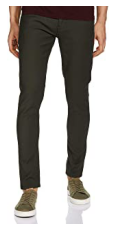

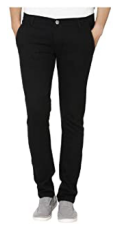

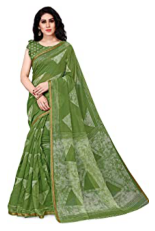

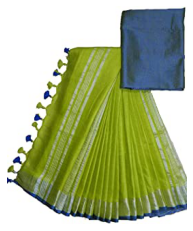

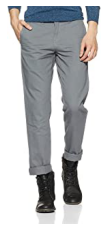

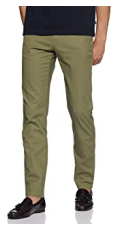

In [4]:
# Let's try to print some of the scrapped images from each category
import matplotlib.image as mpimg
Jeans_train=r'Desktop/images/train/Jeans (men)'
Saree_train=r'Desktop/images/train/Sarees (women)'
Trouser_train=r'Desktop/images/train/Trousers (men)'


Dir_train=[Jeans_train, Saree_train, Trouser_train]
for dirs in Dir_train:
    k=listdir(dirs)
    for i in k[:2]:
        img=mpimg.imread('{}/{}'.format(dirs,i))
        plt.imshow(img)
        plt.axis('off')
        plt.show()

In [5]:
# Defining Dimensions for the image to be input and then loading the images
input_shape=(576,576,3)
img_width=576
img_height=576
nb_train_samples=179
nb_validation_samples=20
batch_size=8
epoch=50

In [6]:
# Training Data Generator( Data Augmentation on Training Images)

Train_generator_augmented=ImageDataGenerator(rescale=1./255,
                                             zoom_range=0.2,
                                             rotation_range=30,
                                             horizontal_flip=True)
Train_generator=Train_generator_augmented.flow_from_directory(Train_data_dir,
                                                              target_size=(img_width,img_height),
                                                              batch_size=batch_size, 
                                                              class_mode='categorical')

# Validation Data Generator
Data_gen=ImageDataGenerator(rescale=1./255)
validation_generator=Data_gen.flow_from_directory(validation_data_dir,
                                                  target_size=(img_width,img_height),
                                                  batch_size=batch_size, 
                                                  class_mode='categorical')

Found 537 images belonging to 3 classes.
Found 60 images belonging to 3 classes.


In [7]:
# Creating the model
model=Sequential()

# First convolution layer
model.add(Conv2D(32,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Second convolution layer
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Third convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Fourth convolution layer
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

print(model.summary())

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 574, 574, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 574, 574, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 287, 287, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 287, 287, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 285, 285, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 285, 285, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 142, 142, 32)      0

In [8]:
# Defining Early stopping and Model check point
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

ES = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=30)
MC = ModelCheckpoint('best.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [9]:
# Fitting the Training Data
history = model.fit_generator(
    Train_generator, 
    epochs=epoch,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples//batch_size,
    steps_per_epoch=nb_train_samples//batch_size,
    callbacks=[ES,MC])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
22/22 [==============================] - ETA: 0s - loss: 2.7005 - accuracy: 0.3669
Epoch 00001: val_accuracy improved from -inf to 0.43750, saving model to best.h5
22/22 [==============================] - 92s 4s/step - loss: 2.7005 - accuracy: 0.3669 - val_loss: 1.0985 - val_accuracy: 0.4375
Epoch 2/50
22/22 [==============================] - ETA: 0s - loss: 1.1030 - accuracy: 0.3920
Epoch 00002: val_accuracy did not improve from 0.43750
22/22 [==============================] - 94s 4s/step - loss: 1.1030 - accuracy: 0.3920 - val_loss: 1.0975 - val_accuracy: 0.3750
Epoch 3/50
22/22 [==============================] - ETA: 0s - loss: 1.0970 - accuracy: 0.3920
Epoch 00003: val_accuracy improved from 0.43750 to 0.50000, saving model to best.h5
22/22 [==============================] - 96s 4s/step - loss: 1.0970 - accuracy: 0.3920 - val_loss: 1.0937 - val_accuracy: 0.5000
Epoch 4/50
22/22 [=================

Epoch 29/50
22/22 [==============================] - ETA: 0s - loss: 0.5401 - accuracy: 0.6648
Epoch 00029: val_accuracy did not improve from 0.93750
22/22 [==============================] - 103s 5s/step - loss: 0.5401 - accuracy: 0.6648 - val_loss: 0.8554 - val_accuracy: 0.5625
Epoch 30/50
22/22 [==============================] - ETA: 0s - loss: 0.5941 - accuracy: 0.6080
Epoch 00030: val_accuracy did not improve from 0.93750
22/22 [==============================] - 102s 5s/step - loss: 0.5941 - accuracy: 0.6080 - val_loss: 0.5801 - val_accuracy: 0.7500
Epoch 31/50
22/22 [==============================] - ETA: 0s - loss: 0.6465 - accuracy: 0.6080
Epoch 00031: val_accuracy did not improve from 0.93750
22/22 [==============================] - 101s 5s/step - loss: 0.6465 - accuracy: 0.6080 - val_loss: 0.9195 - val_accuracy: 0.6250
Epoch 32/50
22/22 [==============================] - ETA: 0s - loss: 0.5078 - accuracy: 0.7216
Epoch 00032: val_accuracy did not improve from 0.93750
22/22 [===

In [10]:
# Model Evaluation
evl=model.evaluate(validation_generator,steps=1)
print("Test Loss",evl[0])
print("Test Accuracy",evl[1])

1/1 [==============================] - 0s 3ms/step - loss: 0.4741 - accuracy: 0.8750
Test Loss 0.47408607602119446
Test Accuracy 0.875


In [12]:
model.save('Prediction_Image.h5')

In [13]:
model = load_model('Prediction_Image.h5')

Input Image is: img181.jpeg


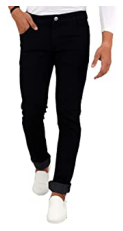

Predicted Label is: trouser

Input Image is: img182.jpeg


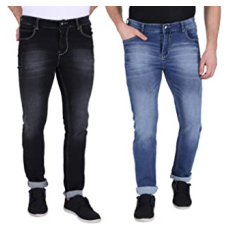

Predicted Label is: trouser

Input Image is: img183.jpeg


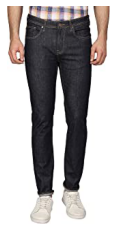

Predicted Label is: trouser

Input Image is: img184.jpeg


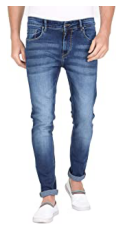

Predicted Label is: trouser

Input Image is: img185.jpeg


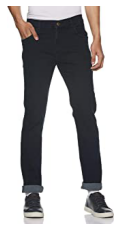

Predicted Label is: trouser

Input Image is: img186.jpeg


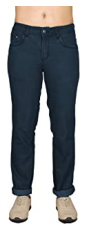

Predicted Label is: trouser

Input Image is: img187.jpeg


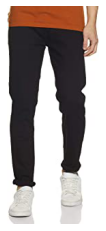

Predicted Label is: trouser

Input Image is: img188.jpeg


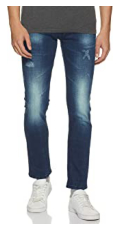

Predicted Label is: trouser

Input Image is: img189.jpeg


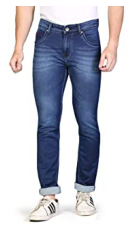

Predicted Label is: trouser

Input Image is: img190.jpeg


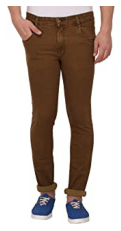

Predicted Label is: trouser

Input Image is: img191.jpeg


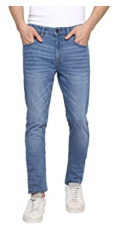

Predicted Label is: trouser

Input Image is: img192.jpeg


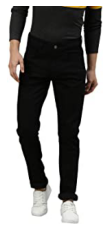

Predicted Label is: trouser

Input Image is: img193.jpeg


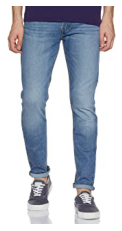

Predicted Label is: trouser

Input Image is: img194.jpeg


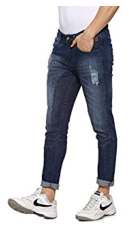

Predicted Label is: sarees

Input Image is: img195.jpeg


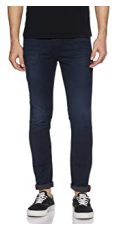

Predicted Label is: trouser

Input Image is: img196.jpeg


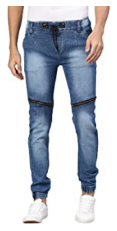

Predicted Label is: trouser

Input Image is: img197.jpeg


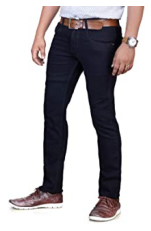

Predicted Label is: trouser

Input Image is: img198.jpeg


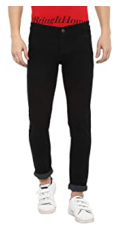

Predicted Label is: trouser

Input Image is: img199.jpeg


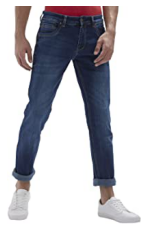

Predicted Label is: trouser

Input Image is: img200.jpeg


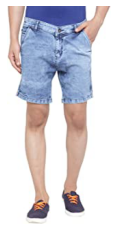

Predicted Label is: sarees

Input Image is: img181.jpeg


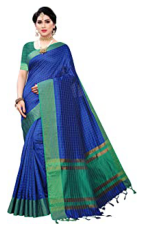

Predicted Label is: sarees

Input Image is: img182.jpeg


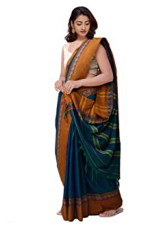

Predicted Label is: sarees

Input Image is: img183.jpeg


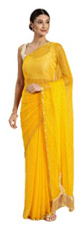

Predicted Label is: sarees

Input Image is: img184.jpeg


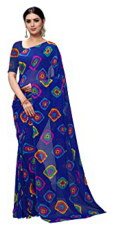

Predicted Label is: sarees

Input Image is: img185.jpeg


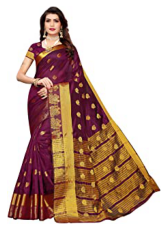

Predicted Label is: sarees

Input Image is: img186.jpeg


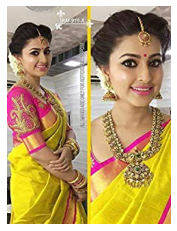

Predicted Label is: sarees

Input Image is: img187.jpeg


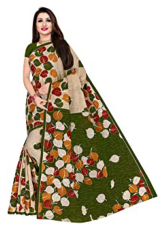

Predicted Label is: sarees

Input Image is: img188.jpeg


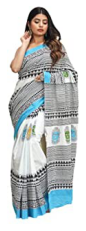

Predicted Label is: sarees

Input Image is: img189.jpeg


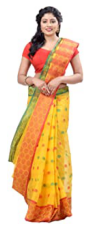

Predicted Label is: sarees

Input Image is: img190.jpeg


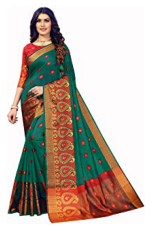

Predicted Label is: sarees

Input Image is: img191.jpeg


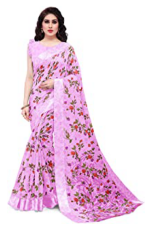

Predicted Label is: sarees

Input Image is: img192.jpeg


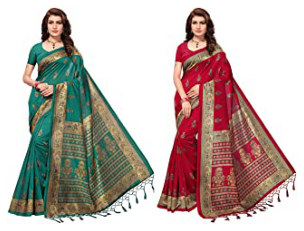

Predicted Label is: sarees

Input Image is: img193.jpeg


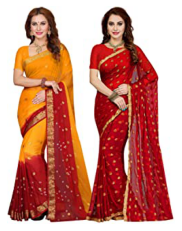

Predicted Label is: sarees

Input Image is: img194.jpeg


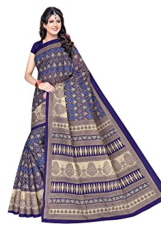

Predicted Label is: sarees

Input Image is: img195.jpeg


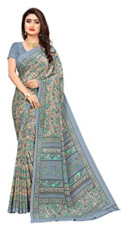

Predicted Label is: sarees

Input Image is: img196.jpeg


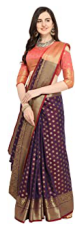

Predicted Label is: sarees

Input Image is: img197.jpeg


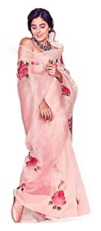

Predicted Label is: sarees

Input Image is: img198.jpeg


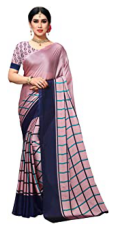

Predicted Label is: sarees

Input Image is: img199.jpeg


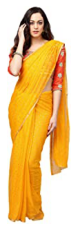

Predicted Label is: sarees

Input Image is: img200.jpeg


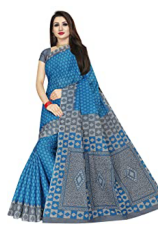

Predicted Label is: sarees

Input Image is: img181.jpeg


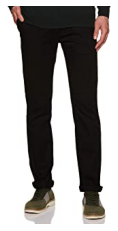

Predicted Label is: trouser

Input Image is: img182.jpeg


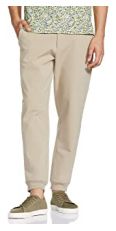

Predicted Label is: sarees

Input Image is: img183.jpeg


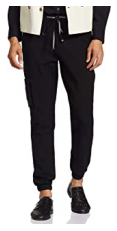

Predicted Label is: trouser

Input Image is: img184.jpeg


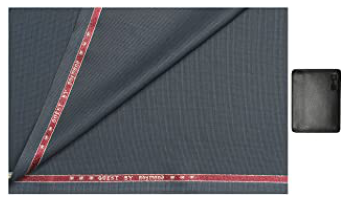

Predicted Label is: sarees

Input Image is: img185.jpeg


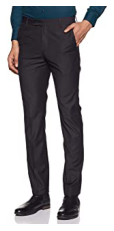

Predicted Label is: trouser

Input Image is: img186.jpeg


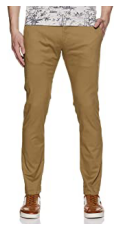

Predicted Label is: trouser

Input Image is: img187.jpeg


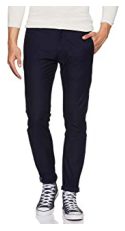

Predicted Label is: trouser

Input Image is: img188.jpeg


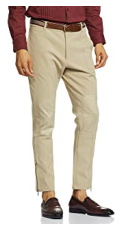

Predicted Label is: trouser

Input Image is: img189.jpeg


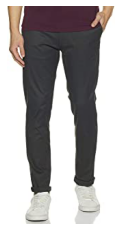

Predicted Label is: trouser

Input Image is: img190.jpeg


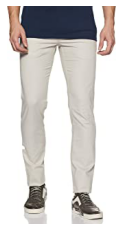

Predicted Label is: trouser

Input Image is: img191.jpeg


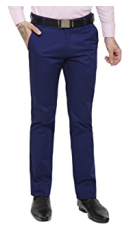

Predicted Label is: trouser

Input Image is: img192.jpeg


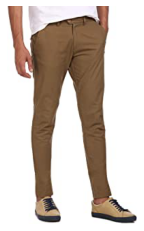

Predicted Label is: trouser

Input Image is: img193.jpeg


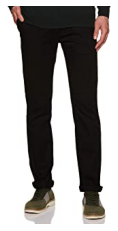

Predicted Label is: trouser

Input Image is: img194.jpeg


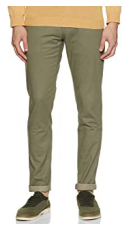

Predicted Label is: trouser

Input Image is: img195.jpeg


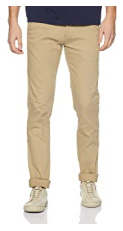

Predicted Label is: trouser

Input Image is: img196.jpeg


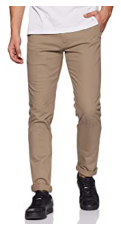

Predicted Label is: trouser

Input Image is: img197.jpeg


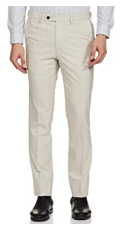

Predicted Label is: sarees

Input Image is: img198.jpeg


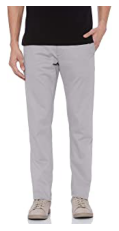

Predicted Label is: trouser

Input Image is: img199.jpeg


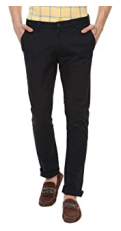

Predicted Label is: trouser

Input Image is: img200.jpeg


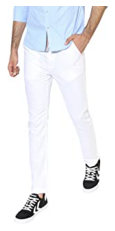

Predicted Label is: sarees



In [15]:
#Predicted samples of the test images
test_jeans=r"Desktop/images/Test/Jeans (men)"
test_Saree=r"Desktop/images/Test/Sarees (women)"
test_trouser=r"Desktop/images/Test/Trousers (men)"


Predicted_class=[]
classes=[test_jeans,test_Saree,test_trouser]
for test_dir in classes:
    for i in listdir(test_dir):
        print("Input Image is:",i)
        img= image.load_img('{}/{}'.format(test_dir,i))                         
        test_image = image.load_img('{}/{}'.format(test_dir,i),target_size=(576, 576))
        test_image = image.img_to_array(test_image)
        plt.imshow(img)
        plt.axis('off')
        plt.show()
        test_image = np.expand_dims(test_image, axis=0)
        result = model.predict(test_image)
        final=np.argmax(result, axis=1)[0]
        if final==0:
            print("Predicted Label is: jeans\n")
            Predicted_class.append("Jeans (men)")
        elif final==1:
            print("Predicted Label is: sarees\n")
            Predicted_class.append("Sarees (women)")
        elif final==2:
            print("Predicted Label is: trouser\n")
            Predicted_class.append("Trousers (men)")